# 為替レートと株価の相関

In [1]:
import datetime as dt
import japanize_matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import mplfinance as mpf
import os
import pandas as pd
import yfinance as yf
import wget

In [2]:
start = '2024-05-01'
end = '2024-08-09'
ticker_exchange = yf.Ticker('USDJPY=X')

In [3]:
df_day = ticker_exchange.history(start=start, end=end, interval='1d')[['Open', 'High', 'Low', 'Close']]
df_day.index = df_day.index.tz_convert('Asia/Tokyo')
df_day

,Open,High,Low,Close
Date,,,,
2024-05-01 08:00:00+09:00,157.722000,157.981995,157.421005,157.722000
2024-05-02 08:00:00+09:00,155.703995,156.251007,153.494995,155.703995
2024-05-03 08:00:00+09:00,153.044998,153.410004,151.880997,153.044998
2024-05-06 08:00:00+09:00,153.565994,154.005005,153.320999,153.565994
2024-05-07 08:00:00+09:00,154.237000,154.639999,153.893997,154.237000
...,...,...,...,...
2024-08-02 08:00:00+09:00,149.201004,149.764008,146.423996,149.201004
2024-08-05 08:00:00+09:00,145.584000,145.917999,141.697006,145.584000
2024-08-06 08:00:00+09:00,145.789993,146.257004,144.063004,145.789993


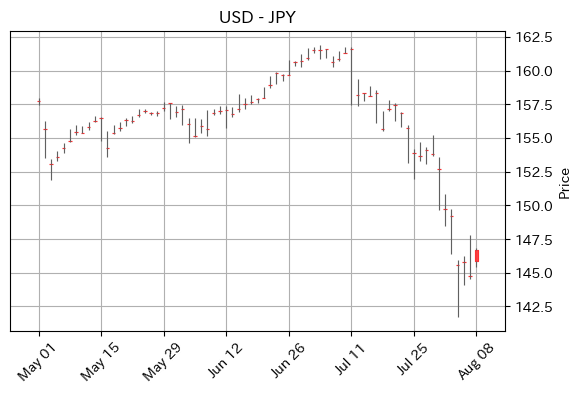

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))

mpf.plot(df_day, type='candle', style='yahoo', ax=ax)
ax.set_title('USD - JPY')

fig.subplots_adjust(left=0.05, right=0.875, bottom=0.15, top=0.9)
plt.grid()
# plt.savefig('report_20240808_exchange_1.png')
plt.show()

In [5]:
df_hour = ticker_exchange.history(start=start, end=end, interval='1h')[['Open', 'High', 'Low', 'Close']]
df_hour.index = df_hour.index.tz_convert('Asia/Tokyo')
df_hour

,Open,High,Low,Close
Datetime,,,,
2024-05-01 08:00:00+09:00,157.695999,157.751007,157.673004,157.746994
2024-05-01 09:00:00+09:00,157.737000,157.856003,157.677994,157.744003
2024-05-01 10:00:00+09:00,157.744003,157.848007,157.725998,157.800995
2024-05-01 11:00:00+09:00,157.798996,157.893005,157.787994,157.876999
2024-05-01 12:00:00+09:00,157.882996,157.934998,157.835007,157.912994
...,...,...,...,...
2024-08-08 12:00:00+09:00,146.591003,146.718002,146.300995,146.376007
2024-08-08 13:00:00+09:00,146.376007,146.388000,145.903000,146.128006
2024-08-08 14:00:00+09:00,146.130997,146.401001,145.934006,145.979004


## 終値を使うため、日本時間で午後 14:00 のデータのみ抽出

In [6]:
list_day = sorted(list(set(['%d-%02d-%02d 14:00:00+09:00' % (ts.year, ts.month, ts.day) for ts in df_hour.index])))
list_series = list()
for ts in list_day:
    try:
        series = df_hour.loc[ts]
        list_series.append(series)
    except KeyError:
        print('no key of \'%s\'' % ts)
df_exchange_jp = pd.concat(list_series, axis=1).T
print(df_exchange_jp.head())

no key of '2024-05-04 14:00:00+09:00'
no key of '2024-05-11 14:00:00+09:00'
no key of '2024-05-18 14:00:00+09:00'
no key of '2024-05-25 14:00:00+09:00'
no key of '2024-06-01 14:00:00+09:00'
no key of '2024-06-08 14:00:00+09:00'
no key of '2024-06-15 14:00:00+09:00'
no key of '2024-06-22 14:00:00+09:00'
no key of '2024-06-29 14:00:00+09:00'
no key of '2024-07-06 14:00:00+09:00'
no key of '2024-07-13 14:00:00+09:00'
no key of '2024-07-20 14:00:00+09:00'
no key of '2024-07-27 14:00:00+09:00'
no key of '2024-08-03 14:00:00+09:00'
                                 Open        High         Low       Close
2024-05-01 14:00:00+09:00  157.854996  157.923004  157.817993  157.919998
2024-05-02 14:00:00+09:00  155.824005  155.889999  155.589996  155.695007
2024-05-03 14:00:00+09:00  152.912994  153.063004  152.843002  152.988007
2024-05-06 14:00:00+09:00  153.929993  153.977997  153.867996  153.921005
2024-05-07 14:00:00+09:00  154.472000  154.552994  154.375000  154.539993


### 日足で取得する株価データのインデックスの時間情報と合わせる。

In [7]:
tdelta = dt.timedelta(hours=14)
df_exchange_jp.index = [ts - tdelta for ts in df_exchange_jp.index]
print(df_exchange_jp)

                                 Open        High         Low       Close
2024-05-01 00:00:00+09:00  157.854996  157.923004  157.817993  157.919998
2024-05-02 00:00:00+09:00  155.824005  155.889999  155.589996  155.695007
2024-05-03 00:00:00+09:00  152.912994  153.063004  152.843002  152.988007
2024-05-06 00:00:00+09:00  153.929993  153.977997  153.867996  153.921005
2024-05-07 00:00:00+09:00  154.472000  154.552994  154.375000  154.539993
...                               ...         ...         ...         ...
2024-08-02 00:00:00+09:00  149.259003  149.373001  148.886002  148.944000
2024-08-05 00:00:00+09:00  143.171997  143.487000  142.408997  142.660004
2024-08-06 00:00:00+09:00  145.507996  146.141998  145.100998  145.867004
2024-08-07 00:00:00+09:00  147.612000  147.813995  146.834000  146.979004
2024-08-08 00:00:00+09:00  146.130997  146.401001  145.934006  145.979004

[72 rows x 4 columns]


### インデックスの時刻情報を取り除く

In [8]:
df_exchange_jp.index = pd.to_datetime(['%d-%02d-%02d' % (ts.year, ts.month, ts.day) for ts in df_exchange_jp.index])
df_exchange_jp

,Open,High,Low,Close
2024-05-01,157.854996,157.923004,157.817993,157.919998
2024-05-02,155.824005,155.889999,155.589996,155.695007
2024-05-03,152.912994,153.063004,152.843002,152.988007
2024-05-06,153.929993,153.977997,153.867996,153.921005
2024-05-07,154.472000,154.552994,154.375000,154.539993
...,...,...,...,...
2024-08-02,149.259003,149.373001,148.886002,148.944000
2024-08-05,143.171997,143.487000,142.408997,142.660004
2024-08-06,145.507996,146.141998,145.100998,145.867004
2024-08-07,147.612000,147.813995,146.834000,146.979004


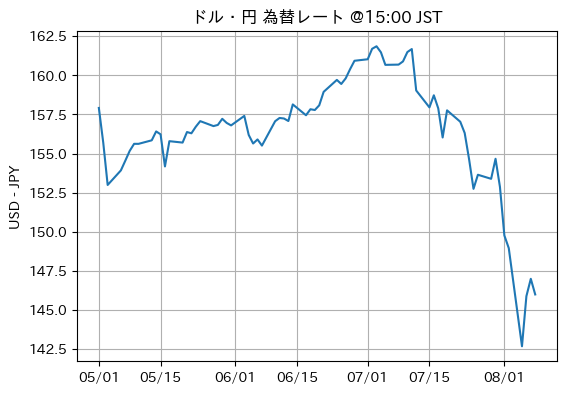

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df_exchange_jp.index, df_exchange_jp['Close'])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax.set_title('ドル・円 為替レート @15:00 JST')
ax.set_ylabel('USD - JPY')
ax.grid()

fig.subplots_adjust(left=0.15, right=0.95, bottom=0.075, top=0.9)
# plt.savefig('report_20240808_exchange_2.png')
plt.show()

### 為替レートの Close を Series に

In [10]:
series_exchange = df_exchange_jp['Close']
series_exchange.name = 'USDJPY'
series_exchange

2024-05-01    157.919998
2024-05-02    155.695007
2024-05-03    152.988007
2024-05-06    153.921005
2024-05-07    154.539993
                 ...    
2024-08-02    148.944000
2024-08-05    142.660004
2024-08-06    145.867004
2024-08-07    146.979004
2024-08-08    145.979004
Name: USDJPY, Length: 72, dtype: float64

## 日経平均で試す

In [11]:
ticker_n225 = yf.Ticker('^N225')
df_n225 = ticker_n225.history(start=start, end=end, interval='1d')
df_n225.index = df_n225.index.tz_convert('Asia/Tokyo')

# インデックスの時刻情報を取り除く
df_n225.index = pd.to_datetime(['%d-%02d-%02d' % (ts.year, ts.month, ts.day) for ts in df_n225.index])

print(df_n225)
print(df_n225.shape)

                    Open          High           Low         Close     Volume  \
2024-05-01  38107.378906  38433.339844  38036.238281  38274.050781  108500000   
2024-05-02  38004.011719  38355.601562  37958.191406  38236.070312  101900000   
2024-05-07  38636.230469  38863.140625  38541.968750  38835.101562  115200000   
2024-05-08  38677.570312  38749.351562  38159.851562  38202.371094  120100000   
2024-05-09  38242.921875  38429.808594  38072.238281  38073.980469  118600000   
...                  ...           ...           ...           ...        ...   
2024-08-02  37444.171875  37471.519531  35880.148438  35909.699219  204300000   
2024-08-05  35249.359375  35301.179688  31156.119141  31458.419922  285600000   
2024-08-06  32077.330078  34911.800781  32077.330078  34675.460938  251200000   
2024-08-07  34122.351562  35849.769531  33739.460938  35089.621094  242800000   
2024-08-08  34645.789062  35379.648438  34207.160156  34831.148438          0   

            Dividends  Stoc

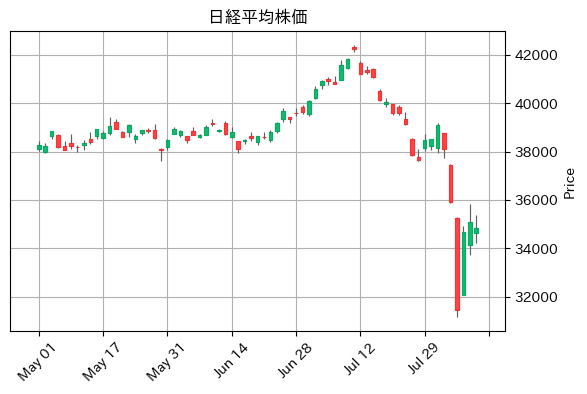

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))

mpf.plot(df_n225, type='candle', style='yahoo', ax=ax)
ax.set_title('日経平均株価')

fig.subplots_adjust(left=0.05, right=0.875, bottom=0.15, top=0.9)
plt.grid()
# plt.savefig('report_20240808_exchange_3.png')
plt.show()

### 日経平均株価の Close を Series に

In [13]:
series_n225 = df_n225['Close']
series_n225.name = 'N225'
series_n225

2024-05-01    38274.050781
2024-05-02    38236.070312
2024-05-07    38835.101562
2024-05-08    38202.371094
2024-05-09    38073.980469
                  ...     
2024-08-02    35909.699219
2024-08-05    31458.419922
2024-08-06    34675.460938
2024-08-07    35089.621094
2024-08-08    34831.148438
Name: N225, Length: 69, dtype: float64

### 為替レートの Series と内部結合

In [14]:
df_exchange_n225 = pd.concat([series_exchange, series_n225], axis=1, join='inner')
df_exchange_n225

,USDJPY,N225
2024-05-01,157.919998,38274.050781
2024-05-02,155.695007,38236.070312
2024-05-07,154.539993,38835.101562
2024-05-08,155.169998,38202.371094
2024-05-09,155.621994,38073.980469
...,...,...
2024-08-02,148.944000,35909.699219
2024-08-05,142.660004,31458.419922
2024-08-06,145.867004,34675.460938
2024-08-07,146.979004,35089.621094


In [15]:
corr_n225 = float(df_exchange_n225.corr().loc['N225', 'USDJPY']) * 100
print('%.1f%%' % corr_n225)

87.1%


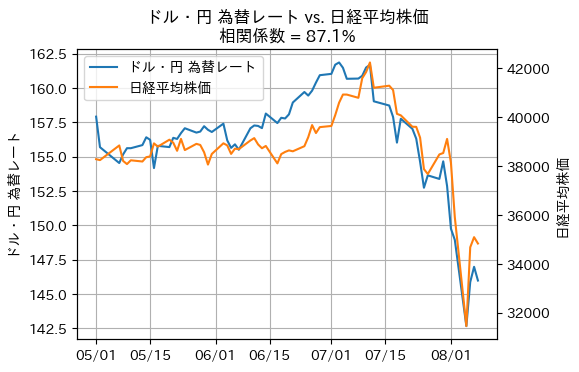

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.set_title('ドル・円 為替レート vs. 日経平均株価\n相関係数 = %.1f%%' % corr_n225)
ax.plot(df_exchange_n225.index, df_exchange_n225['USDJPY'], color='C0', label='ドル・円 為替レート')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax.set_ylabel('ドル・円 為替レート')

ax2 = ax.twinx()
ax2.plot(df_exchange_n225.index, df_exchange_n225['N225'], color='C1', label='日経平均株価')
ax2.set_ylabel('日経平均株価')

ax.grid()
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='best')
#plt.legend(loc = 'best')

fig.subplots_adjust(left=0.15, right=0.85, bottom=0.075, top=0.8)
# plt.savefig('report_20240808_exchange_4.png')
plt.show()